<a href="https://colab.research.google.com/github/Nathalia-Volpi/DataScience_Beggining/blob/main/Correla%C3%A7%C3%A3o_e_Regress%C3%A3o.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <font color=green size=10>CURSO DE ESTATÍSTICA - PARTE 4</font>
***

## Trabalho sobre correlação e regressão

Utilizando os conhecimentos adquiridos em nosso treinamento realize a análise de regressão proposta abaixo.

Siga o roteiro proposto e vá completando as células vazias.

# <font color=green>DATASET DO PROJETO</font>
***

### Fonte: https://www.kaggle.com/dongeorge/beer-consumption-sao-paulo

### Descrição:
A cerveja é uma das bebidas mais democráticas e consumidas no mundo. Não sem razão, é perfeito para quase todas as situações, desde o happy hour até grandes festas de casamento.

Os dados (amostra) foram coletados em São Paulo - Brasil, em uma área universitária, onde existem algumas festas com grupos de alunos de 18 a 28 anos de idade (média).

### Dados:
- **temp_media** - Temperatura Média (°C)
- **consumo** - Consumo de Cerveja (litros)


---

### Solução do problema com dependência do statsmodels

In [ ]:
!pip install scipy==1.2 --upgrade

### Utilize a célula abaixo para importar as biblioteca que precisar para executar as tarefas
#### <font color='red'>Sugestões: pandas, numpy, scipy, statsmodels</font>

In [ ]:
import pandas as pd

In [ ]:
import numpy as np

In [ ]:
from scipy.stats import chi2

In [ ]:
from scipy.stats import kurtosis

In [ ]:
from scipy.stats import skew

In [ ]:
from scipy.stats import probplot
import matplotlib.pyplot as plt

In [ ]:
from scipy.stats import normaltest

In [ ]:
from scipy.stats import t as t_student

In [ ]:
import seaborn as sns

In [ ]:
from scipy.misc import factorial

In [ ]:
import statsmodels.api

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


### Importe o dataset

In [ ]:
dados = pd.read_csv ('dados_projeto.csv', sep = ';')

### Visualize o conteúdo do DataFrame

In [ ]:
dados.head() ## X a temp média e Y consumo de cerveja

,Y,X
0,25461,27.30
1,28972,27.02
2,30814,24.82
3,29799,23.98
4,28900,23.82


In [ ]:
dados = pd.DataFrame(dados)
dados.head()


,Y,X
0,25461,27.30
1,28972,27.02
2,30814,24.82
3,29799,23.98
4,28900,23.82


### Obtenha e avalie as estatísticas descritivas dos dados

In [ ]:
dados.describe()

,Y,X,Y_previsto_statsmodels,Resíduos
count,365.000000,365.000000,365.000000,3.650000e+02
mean,25401.367123,21.226356,25401.367123,1.085413e-11
std,4399.142703,3.180108,2527.812049,3.600364e+03
min,14343.000000,12.900000,18782.892011,-9.221434e+03
25%,22008.000000,19.020000,23647.573138,-2.845499e+03
50%,24867.000000,21.380000,25523.495925,-3.152745e+02
75%,28631.000000,23.280000,27033.772745,2.409023e+03
max,37937.000000,28.860000,31469.217302,9.392497e+03


In [ ]:
dados.cov() ## Indicativo de associação positiva - x aumenta e y aumenta

,Y,X
Y,1.935246e+07,8038.714473
X,8.038714e+03,10.113085


In [ ]:
dados.corr()

,Y,X
Y,1.000000,0.574615
X,0.574615,1.000000


In [ ]:
import statsmodels.api as sm

### Análise gráfica
### Construa um box plot para cada variável do dataset

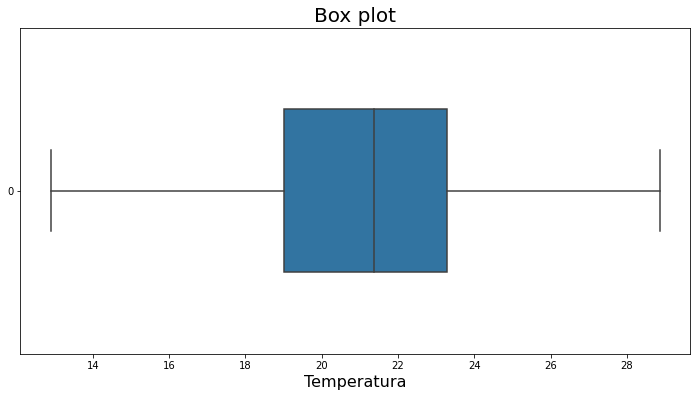

In [ ]:
ax = sns.boxplot(data=dados.X, orient='h', width=0.5)
ax.figure.set_size_inches(12, 6)
ax.set_title('Box plot', fontsize=20)
ax.set_xlabel('Temperatura', fontsize=16)
ax

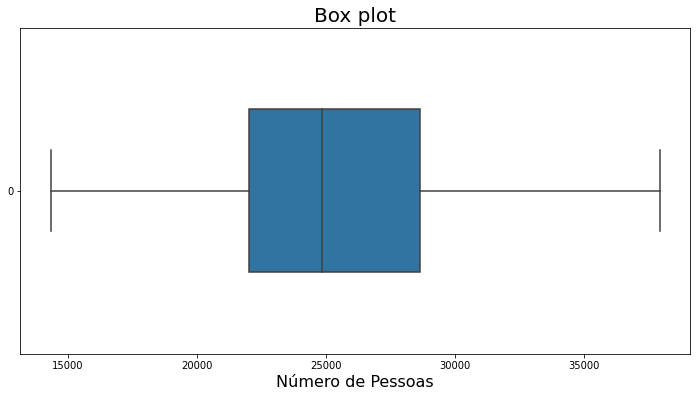

In [ ]:
ax = sns.boxplot(data=dados.Y, orient='h', width=0.5)
ax.figure.set_size_inches(12, 6)
ax.set_title('Box plot', fontsize=20)
ax.set_xlabel('Número de Pessoas', fontsize=16)
ax

### Identifique se existe uma relação linear entre as variáveis $Y$ e $X$
### <font color='red'>Utilizando o método gráfico</font>

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


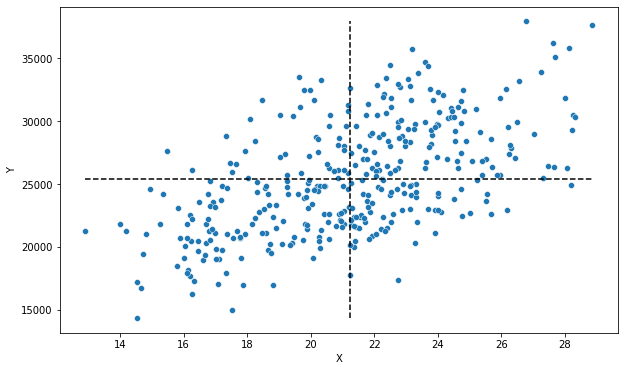

In [ ]:
x = dados.X ## Matriz de correlação
y = dados.Y

ax = sns.scatterplot(x, y)
ax.figure.set_size_inches(10, 6)
ax.hlines(y = y.mean(), xmin = x.min(), xmax = x.max(), colors='black', linestyles='dashed')
ax.vlines(x = x.mean(), ymin = y.min(), ymax = y.max(), colors='black', linestyles='dashed')

### <font color='red'>Utilizando a matriz de correlação</font>

In [ ]:
dados.corr()

,Y,X
Y,1.000000,0.574615
X,0.574615,1.000000


### Avalie os resultados acima:

É possível afirmar que existe uma relação linear entre as variáveis?

Resp.: Sim

É possível quantificar a intensidade dessa relação?

Resp.: O resultado da distribuição da co variancia indica uma relação positiva entre os dados e os dados de correlação indicam uma relação linear de 0.57 (baixo - não mto forte)

É possível afirmar que existe uma relação de causalidade entre $Y$ e $X$ a partir dos resultados da matriz de correlação?

Resp.: Não. Pois uma correlação linear não indica necessariamente uma relação de causalidade

### Prepare os dados para estimar um modelo de regressão linear simples

In [ ]:
Y = dados.Y
X = sm.add_constant(dados.X)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


### Estime o modelo de regressão linear simples

In [ ]:
resultado_regressao = sm.OLS(Y, X).fit()
print(resultado_regressao.summary()) ## O teste t indica que existe uma correlação positiva entre as duas variáveis

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.330
Model:                            OLS   Adj. R-squared:                  0.328
Method:                 Least Squares   F-statistic:                     178.9
Date:                Sun, 13 Feb 2022   Prob (F-statistic):           1.87e-33
Time:                        11:42:39   Log-Likelihood:                -3506.3
No. Observations:                 365   AIC:                             7017.
Df Residuals:                     363   BIC:                             7024.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       8528.9073   1275.363      6.687      0.0

### Visualize o resultado da regressão

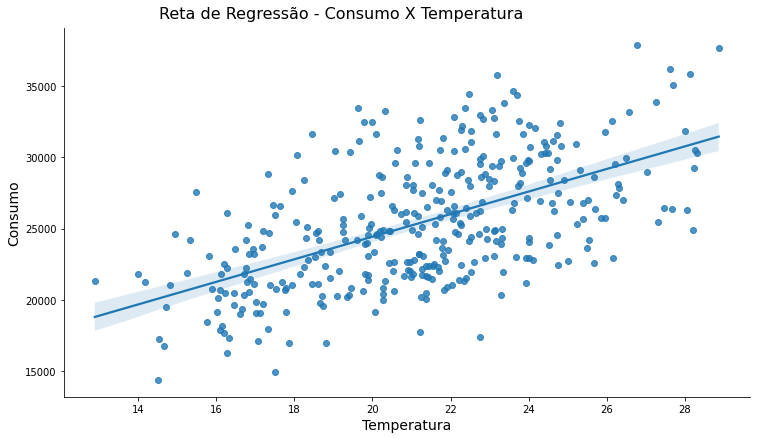

In [ ]:
ax = sns.lmplot(x="X", y="Y", data=dados)
ax.fig.set_size_inches(12, 6)
ax.fig.suptitle('Reta de Regressão - Consumo X Temperatura ', fontsize=16, y=1.02)
ax.set_xlabels("Temperatura", fontsize=14)
ax.set_ylabels("Consumo", fontsize=14)
ax

### Obtenha o $Y$ previsto

In [ ]:
dados['Y_previsto_statsmodels'] = resultado_regressao.predict()
dados.head()

,Y,X,Y_previsto_statsmodels
0,25461,27.30,30229.200544
1,28972,27.02,30006.633434
2,30814,24.82,28257.891852
3,29799,23.98,27590.190521
4,28900,23.82,27463.009315


### Utilizando nosso modelo estimado para fazer previsões.
### Qual seria o consumo de cerveja para um dia com temperatura média de 42° C?

In [ ]:
resultado_regressao.predict([1, 42])[0] ## o zero é pra pegar apenas esta informação

41913.97383816628

### Obtenha os resíduos da regressão

In [ ]:
dados['Resíduos'] = dados.Y - dados.Y_previsto_statsmodels
dados.head()

,Y,X,Y_previsto_statsmodels,Resíduos
0,25461,27.30,30229.200544,-4768.200544
1,28972,27.02,30006.633434,-1034.633434
2,30814,24.82,28257.891852,2556.108148
3,29799,23.98,27590.190521,2208.809479
4,28900,23.82,27463.009315,1436.990685


### Plote um gráfico de dispersão dos resíduos da regressão contra o $Y$ previsto

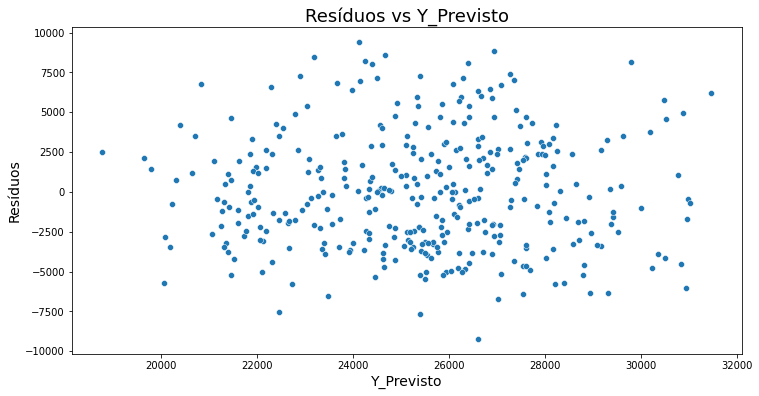

In [ ]:
ax = sns.scatterplot(x=dados.Y_previsto_statsmodels, y=dados.Resíduos) ## Indica se a variancia é constante = neste caso é constante
ax.figure.set_size_inches(12, 6)
ax.set_title('Resíduos vs Y_Previsto', fontsize=18)
ax.set_xlabel('Y_Previsto', fontsize=14)
ax.set_ylabel('Resíduos', fontsize=14)
ax

### Obtenha o QQPlot dos resíduos

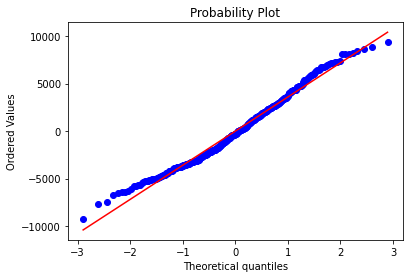

In [ ]:
ax= probplot(dados.Resíduos, plot = plt)

In [ ]:
stats, p_valor = normaltest (dados.Resíduos)
p_valor ## Não vem de uma distribuição normal

0.003518057601769221

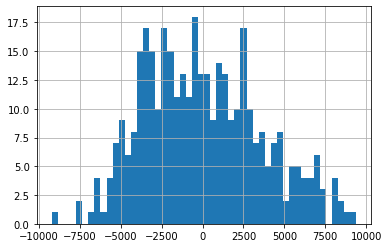

In [ ]:
dados.Resíduos.hist(bins =50)

### <font color='red'>A partir dos outputs acima, qual conclusão podemos tirar sobre o comportamento dos resíduos?</font>

Os resíduos não se distribuem como uma normal

### Obtenha o R² da regressão pelo método da soma dos quadrados

# $$R^2 = \frac{SQR}{SQT}$$

In [ ]:
SQE = dados.Resíduos.apply(lambda u: u**2).sum()
SQE

4718394688.067692

In [ ]:
SQT = dados.Y.apply(lambda y: (y - dados.Y.mean())**2).sum()
SQT

7044294174.805479

In [ ]:
SQR = dados.Y_previsto_statsmodels.apply(lambda y: (y - dados.Y.mean())**2).sum()
SQR

2325899486.7377872

In [ ]:
SQT = SQR + SQE
SQT

7044294174.805479

In [ ]:
R_2 = SQR/SQT
R_2

0.33018204933243217